<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
print("Column Names:")
print(df.columns)

# Display data types
print("\nData Types:")
print(df.dtypes)

# Display summary information
print("\nDataset Info:")
df.info()

# Display basic statistics
print("\nSummary Statistics:")
print(df.describe())

Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

Summary Statist

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here
# Calculate value counts for key columns
employment_counts = df['Employment'].value_counts()
jobsat_counts = df['JobSat'].value_counts()
yearscodepro_counts = df['YearsCodePro'].value_counts()

# Display the value counts
print("Employment Distribution:\n", employment_counts)
print("\nJob Satisfaction Distribution:\n", jobsat_counts)
print("\nYears of Professional Coding Experience Distribution:\n", yearscodepro_counts)


Employment Distribution:
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


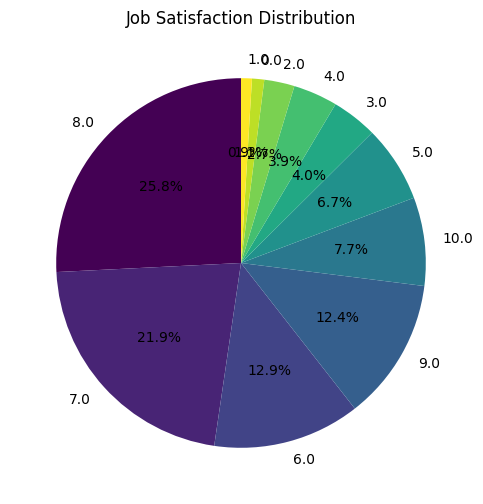

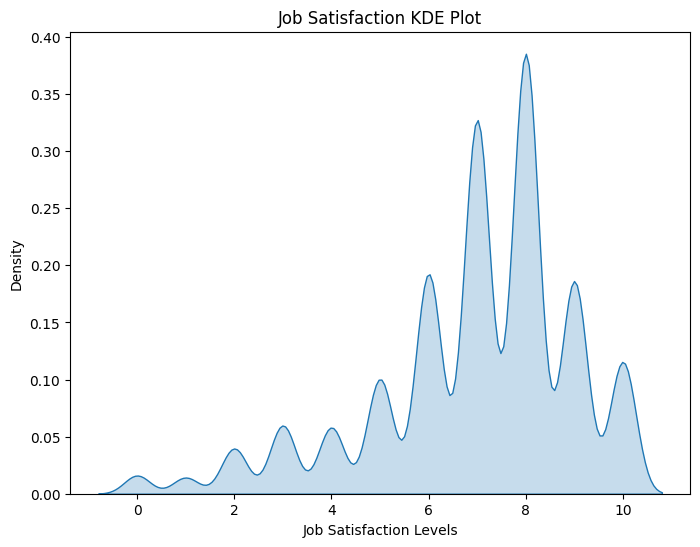

In [7]:
if 'JobSat' in df.columns and not df['JobSat'].isnull().all():
    plt.figure(figsize=(8, 6))
    df['JobSat'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title("Job Satisfaction Distribution")
    plt.ylabel("")
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x='JobSat', fill=True)
    plt.title("Job Satisfaction KDE Plot")
    plt.xlabel("Job Satisfaction Levels")
    plt.ylabel("Density")
    plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


Note: you may need to restart the kernel to use updated packages.


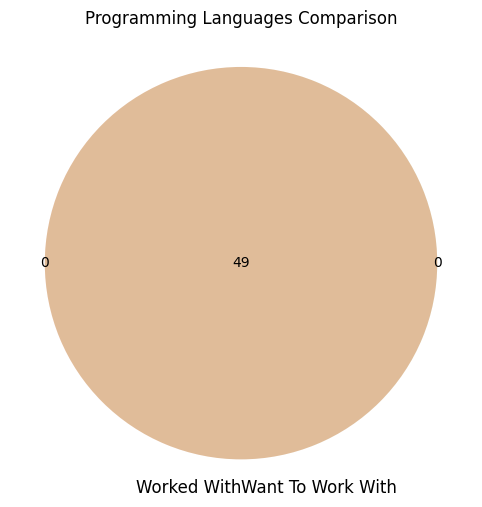

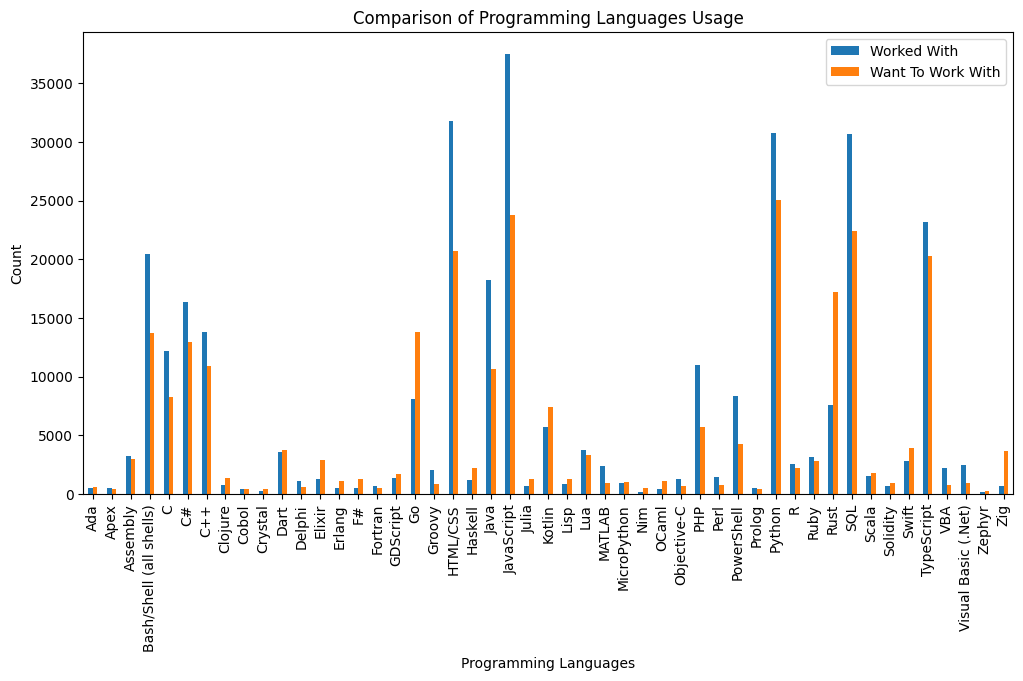

In [8]:
%pip install matplotlib-venn
from matplotlib_venn import venn2
if 'LanguageHaveWorkedWith' in df.columns and 'LanguageWantToWorkWith' in df.columns:
    # Convert comma-separated values to sets
    worked_with = set(
        lang.strip() for sublist in df['LanguageHaveWorkedWith'].dropna().str.split(';') for lang in sublist
    )
    want_to_work_with = set(
        lang.strip() for sublist in df['LanguageWantToWorkWith'].dropna().str.split(';') for lang in sublist
    )
    
    # Visualizing with a Venn Diagram
    plt.figure(figsize=(6, 6))
    venn2([worked_with, want_to_work_with], ('Worked With', 'Want To Work With'))
    plt.title("Programming Languages Comparison")
    plt.show()
    
    # Grouped Bar Chart Visualization
    lang_counts = pd.DataFrame({
        'Worked With': df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts(),
        'Want To Work With': df['LanguageWantToWorkWith'].str.split(';').explode().value_counts()
    }).fillna(0)
    
    lang_counts.plot(kind='bar', figsize=(12, 6))
    plt.title("Comparison of Programming Languages Usage")
    plt.xlabel("Programming Languages")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()
    

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1400x1800 with 0 Axes>

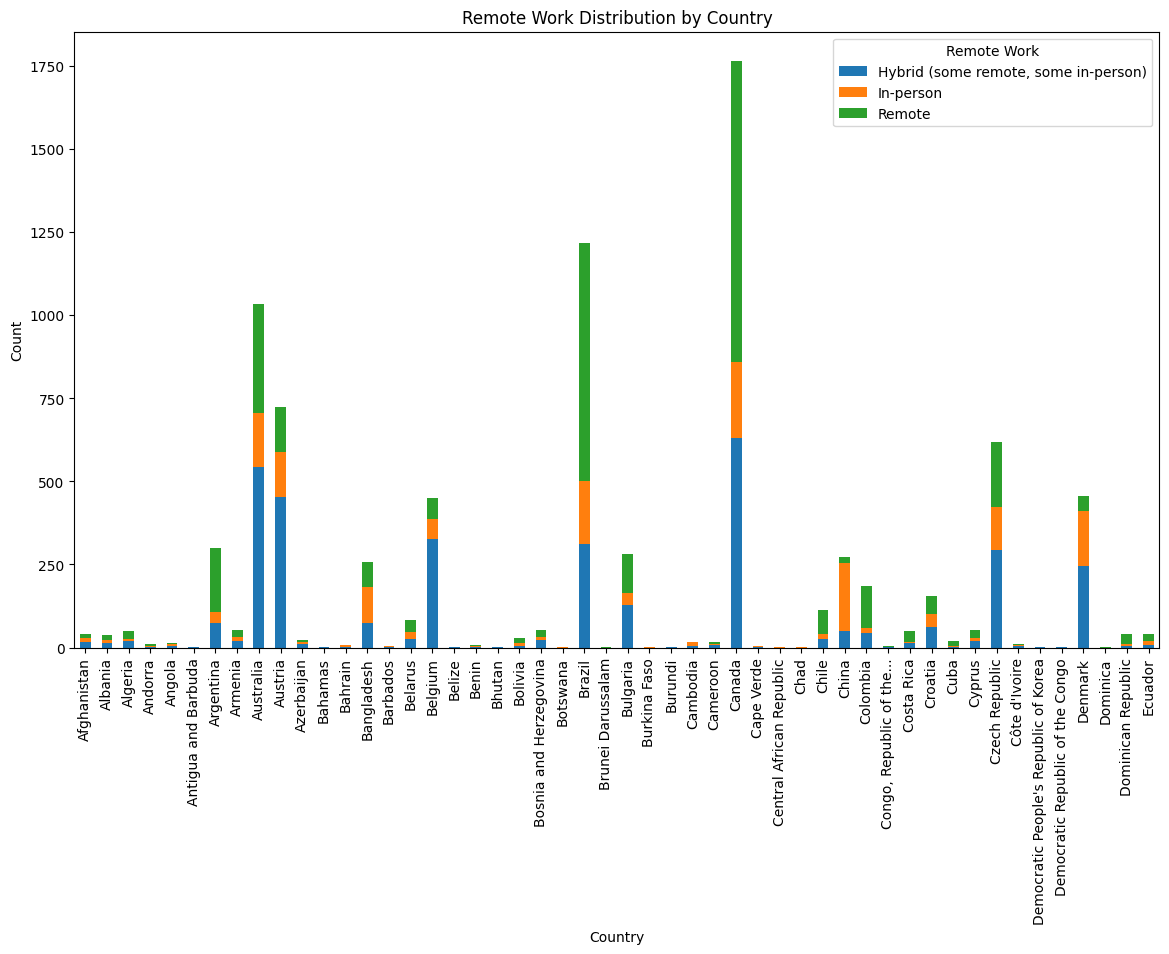

In [15]:
plt.figure(figsize=(14, 18))
remote_work_counts = df.groupby(['Country', 'RemoteWork']).size().unstack().fillna(0).head(50)
remote_work_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Remote Work Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Remote Work')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson correlation coefficient between Job Satisfaction and Years of Professional Coding Experience: 0.10415320964659897


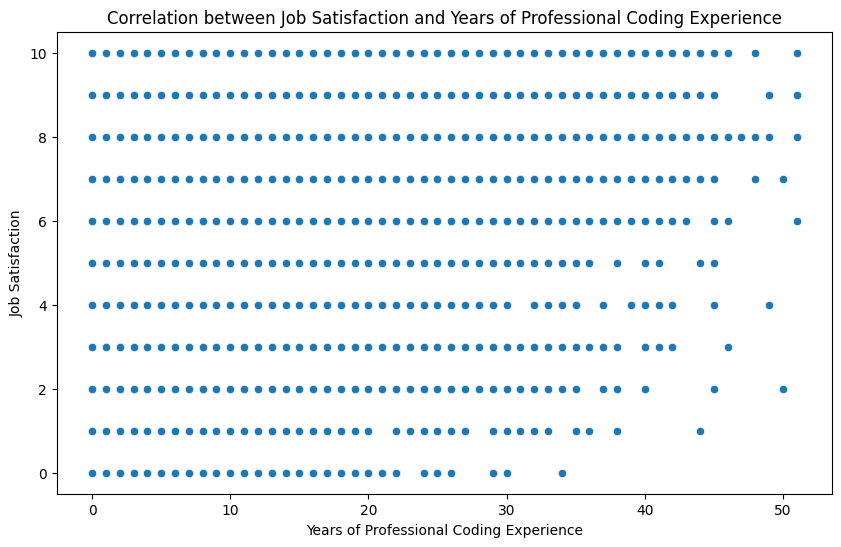

In [18]:
# Calculate the Pearson correlation coefficient between JobSat and YearsCodePro
correlation = df['JobSat'].astype(float).corr(df['YearsCodePro'].replace('Less than 1 year', 0).replace('More than 50 years', 51).astype(float), method='pearson')

# Display the correlation coefficient
print(f"Pearson correlation coefficient between Job Satisfaction and Years of Professional Coding Experience: {correlation}")

# Visualize the correlation using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['YearsCodePro'].replace('Less than 1 year', 0).replace('More than 50 years', 51).astype(float), y=df['JobSat'].astype(float))
plt.title('Correlation between Job Satisfaction and Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction')
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.



Cross-tabulation of Employment and Education Level:
EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                   

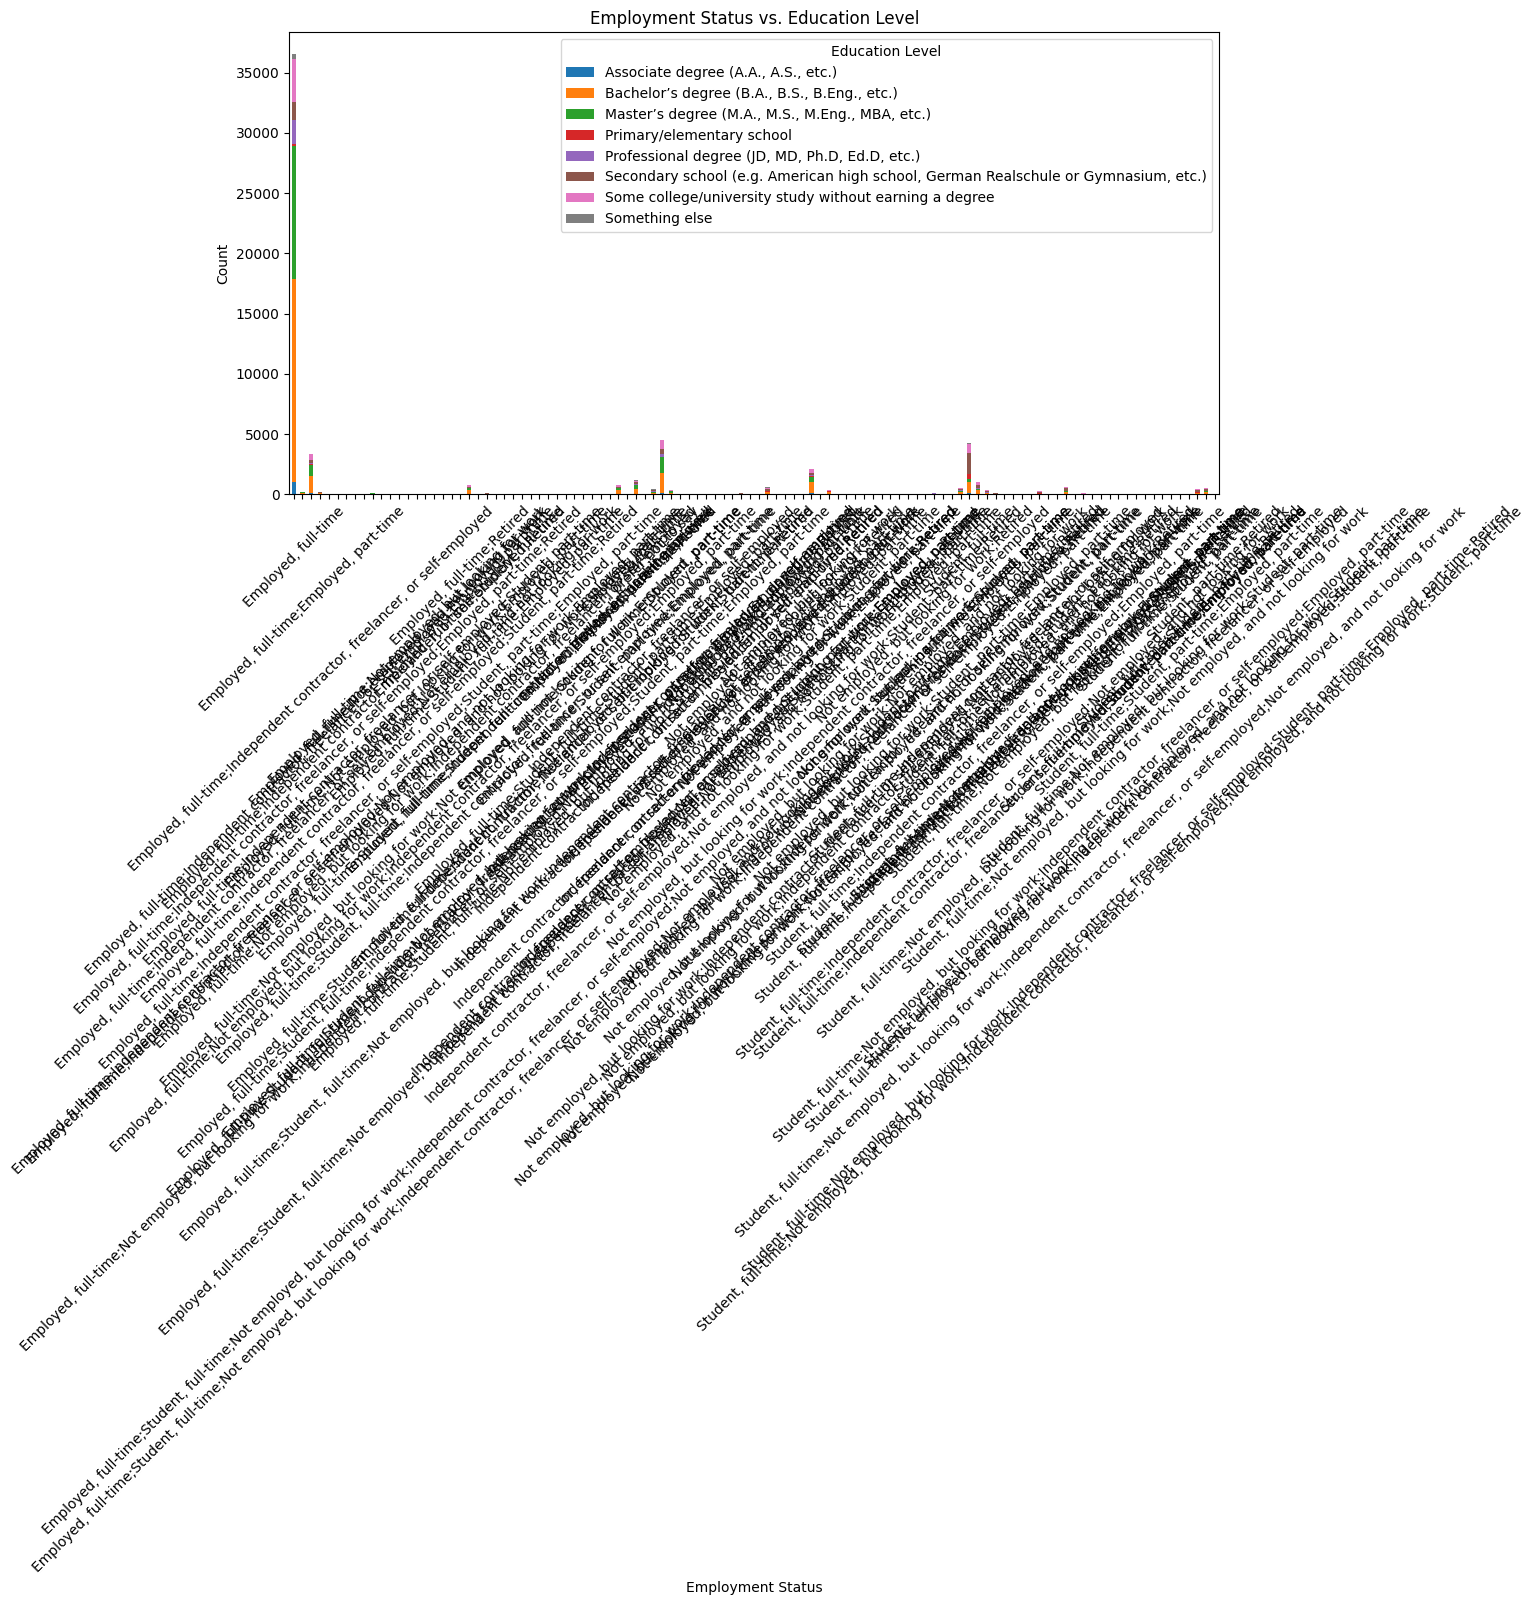

In [24]:
if 'Employment' in df.columns and 'EdLevel' in df.columns:
    crosstab_result = pd.crosstab(df['Employment'], df['EdLevel'])
    print("\nCross-tabulation of Employment and Education Level:")
    print(crosstab_result)
    
    crosstab_result.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title("Employment Status vs. Education Level")
    plt.xlabel("Employment Status")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Education Level")
    plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [12]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
